# Analyse of data from road and death

In [1]:
# Libs necessary

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# read data 

In [3]:
df = pd.read_csv('data/Crash_Data.csv', low_memory=False)

In [9]:
# first information about the data

In [10]:
df.shape

(52843, 23)

In [11]:
df.describe()

,Crash ID,Month,Year,Age
count,5.284300e+04,52843.000000,52843.000000,52843.000000
mean,2.003021e+07,6.568685,2002.729974,39.662377
std,9.383542e+04,3.457347,9.378570,21.806198
min,1.989100e+07,1.000000,1989.000000,-9.000000
25%,1.995111e+07,4.000000,1995.000000,22.000000
50%,2.002144e+07,7.000000,2002.000000,34.000000
75%,2.010408e+07,10.000000,2010.000000,55.000000
max,2.021801e+07,12.000000,2021.000000,101.000000


In [13]:
# first look to data

In [14]:
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,NaN,Passenger,Male,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,NaN,Driver,Male,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [15]:
# Checking categorycal variavels

In [16]:
df['Crash Type'].value_counts()

Single      29249
Multiple    23594
Name: Crash Type, dtype: int64

### Types of accidentes
##### Single and Multiple has the same order 

In [17]:
df['Age Group'].value_counts()

17_to_25       13771
40_to_64       13415
26_to_39       12364
75_or_older     5110
0_to_16         4080
65_to_74        4013
Name: Age Group, dtype: int64

#### The group from 17 to 64 has the some order of acidents

In [13]:
df['Time of day'].value_counts()

Day      30117
Night    22726
Name: Time of day, dtype: int64

### Have more accidents in Day, but the order is not so different.

In [15]:
df['Christmas Period'].value_counts()

No     51208
Yes     1635
Name: Christmas Period, dtype: int64

### In Christmas don't has some accidents

In [16]:
df['Easter Period'].value_counts()

No     52573
Yes      270
Name: Easter Period, dtype: int64

### The same to Easter

In [17]:
df['Gender'].value_counts()

Male           37813
Female         15002
Unspecified        1
Name: Gender, dtype: int64

### Man envolved in accidents is the double compared with womans, and don't have enoght information
### about others genders

In [19]:
df['Road User'].value_counts()

Driver                          23816
Passenger                       12269
Pedestrian                       8242
Motorcycle rider                 6637
Pedal cyclist                    1424
Motorcycle pillion passenger      363
Other/-9                           92
Name: Road User, dtype: int64

### Driver and Passenger sofer more accidents

In [20]:
df['Speed Limit'].value_counts()

100            11020
100             7228
60              7123
60              6563
80              4439
110             3970
50              2883
110             2068
70              1888
80              1680
90               820
-9               684
70               650
90               317
40               299
75               252
130              116
40                47
20                24
50                20
10                18
30                11
<40                5
30                 3
20                 3
5                  3
Unspecified        2
75                 2
25                 2
15                 1
Name: Speed Limit, dtype: int64

### Velociti is not only factor, because 60 and 100 has the same amount of accidents

In [21]:
df['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989])

<AxesSubplot: xlabel='Year', ylabel='Crash ID'>

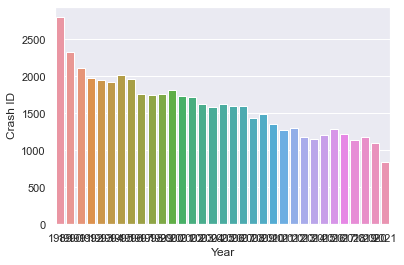

In [23]:
dfg = df.groupby('Year',as_index = False).count()
#dfg
sns.set(font_scale = 1)
sns.barplot(dfg, x = dfg['Year'], y=dfg['Crash ID'])

## The dead decaid with time

In [24]:
df['Month'].value_counts()

12    4721
3     4673
8     4512
10    4509
5     4447
11    4388
9     4337
6     4333
1     4329
7     4321
4     4298
2     3975
Name: Month, dtype: int64

## Don't have relation based in amount of dead and month

In [25]:
df['Day of week'].value_counts()

Weekday    31066
Weekend    21777
Name: Day of week, dtype: int64

In [30]:
31066/5

6213.2

In [31]:
21777/4

5444.25

## No relatoin of dead in week

In [32]:
df[df['Day of week']=='Weekend']['Dayweek'].value_counts()

Saturday    9696
Sunday      8460
Friday      2900
Monday       721
Name: Dayweek, dtype: int64

## In monday don't have many deads

In [33]:
df[df['Day of week']!='Weekend']['Dayweek'].value_counts()

Thursday     7106
Wednesday    6663
Tuesday      6145
Friday       5765
Monday       5387
Name: Dayweek, dtype: int64